In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt  
import halotools.mock_observables as mo    

In [2]:
with open('color_data0_cul_integral.pkl', 'rb') as f:
    colors = pickle.load(f)
with open('color_data1_cul_integral.pkl', 'rb') as f:
    colors_1 = pickle.load(f)

In [3]:
temp = []
for i in range(len(colors)):
    temp.append(colors[i][0][1])
for i in range(len(colors_1)):
    temp.append(colors_1[i][0][1])

In [4]:
with open('mass_lyman_distance_1_mass_distance_1.pkl', 'rb') as f:
    galaxy_test = pickle.load(f)

In [5]:
#galaxy[0]is column density, 1 is the mass, 2 is the spatial location,

In [6]:
#temp are the spatial locations of LLS
column_density =[]
mass_density = []
location = []
lls_location = []
for i in range(1,5):
    for n in range(i,5):
        data1 = []
        name = "mass_" + "lyman_distance_" +format(i) + "_mass_distance_" + format(n) + ".pkl"
        with open(name, 'rb') as f:
            data1 = pickle.load(f)
        for z in data1[0]:
            column_density.append(z)
        for k in data1[1]:
            mass_density.append(k)
        for p in data1[2]:
            location.append(p)
        for h in data1[3]:
            lls_location.append(h)

In [7]:
Lbox = 40.0
period = np.array([Lbox,Lbox,Lbox])

In [8]:
def get_xyz(input):
    x = [];y = []; z = []
    for i in input:
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])
    return x,y,z

In [9]:
x,y,z = get_xyz(location)
x2,y2,z2 = get_xyz(lls_location)

In [10]:
sample = np.vstack((x,y,z)).T 
sample2 = np.vstack((x2,y2,z2)).T

In [11]:
rbins = np.logspace(-3,1,21)
MCF = mo.marked_tpcf(sample1 = sample,rbins = rbins,sample2 = sample2, marks1=mass_density, period=period, normalize_by='number_counts', weight_func_id=1)

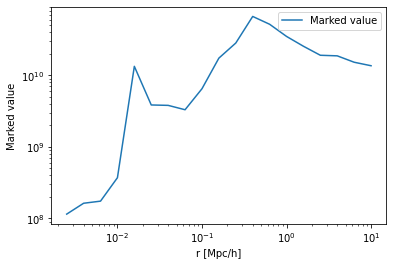

In [12]:
import matplotlib.pyplot as plt
plt.loglog(rbins[1:], MCF[1], label='Marked value')
plt.xlabel('r [Mpc/h]')
plt.ylabel('Marked value')
plt.legend()
plt.show()